In [26]:
#%%
import plotly.express as px       # interactive plots
import matplotlib.pyplot as plt   # non interactive plots
import numpy as np
import pandas as pd
import textwrap                                                 # need this to make the long title

In [43]:
csvConed = "DataFiles/GasHistory_2010_ReportFrequency_Monthly.csv"
csvFDNY  = "DataFiles/FDNY/Geoid_Count2018.csv"#"DataFiles/FDNY/FDNY2018.csv"
conedMonthlyDF  = pd.read_csv(csvConed)  
fdnyMonthlyDF  = pd.read_csv(csvFDNY)  
csvHeader = ['Geoid', 'MonthYear_ConEd', 'NumberOfReports_ConEd', 
# 'MonthYear_FDNY', 'NumberOfReports_FDNY', 
'CountyName', 'CensusTract', "Month"] 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
vsDF = pd.DataFrame()
for col in range(0, len(csvHeader)):
    vsDF[csvHeader[col]] = str


MIN_NUM_TRACTS_NEEDED_TO_PRINT = 140
coned_CENSUS_TRACT_COL = "CensusTract_2010"
coned_TOTAL_REPORT     = "TotalReports"
coned_COUNTY_NAME      = "CountyName_2010"
coned_GEOID            = "GEOID_SCT"
fdny_TOTAL_REPORT      = "NumberOfReports"
fdny_GEOID             = "Geoid"

# FIXING FDNY DATA: Spliting Time col to Month and Year and then adding new col that is Month-yyyy string like my con ed data 
fdnyMonthlyDF[['Month', 'Year']] = fdnyMonthlyDF.Time.str.split("/",expand=True)                                    
fdnyMonthlyDF[['Month', 'Year']] = fdnyMonthlyDF[['Month', 'Year']].apply(pd.to_numeric)                     
fdnyMonthlyDF = fdnyMonthlyDF.sort_values(by=['Year', 'Month'], ascending=False).drop(columns=['Time'])
fdnyMonthlyDF = fdnyMonthlyDF.reset_index(drop=True)  
fdnyMonthlyDF["MonthYear"] = str
for row in range(0, len(fdnyMonthlyDF)): 
    monthYearStr = months[int(fdnyMonthlyDF.iloc[row]["Month"])-1]+"-"+str(fdnyMonthlyDF.iloc[row]["Year"])
    fdnyMonthlyDF.at[row, "MonthYear"] = monthYearStr
print("---------- FDNY Data for 2018 ----------\n")
print(fdnyMonthlyDF)
print("---------- ConEdison Data for Dec 2019, Jan 2020, Feb 2020 ----------\n")
print(conedMonthlyDF)

---------- FDNY Data for 2018 ----------

             Geoid  NumberOfReports  Month  Year      MonthYear
0      36047089000                3     12  2018  December-2018
1      36081043701                1     12  2018  December-2018
2      36085012200                1     12  2018  December-2018
3      36005009000                9     12  2018  December-2018
4      36005014300                2     12  2018  December-2018
...            ...              ...    ...   ...            ...
11460  36061010602                1      1  2018   January-2018
11461  36081058300                1      1  2018   January-2018
11462  36081099100                1      1  2018   January-2018
11463  36081093800                1      1  2018   January-2018
11464  36081029400                1      1  2018   January-2018

[11465 rows x 5 columns]
---------- ConEdison Data for Dec 2019, Jan 2020, Feb 2020 ----------

         MonthYear  CensusTract_2010  TotalReports  CensusTract_2010_ID  \
0    February-2020

In [45]:
# CONEDISON: POPULATING COLUMNS FOR CON EDISON AND OTHERS: Need to do this to seperate usable months that got enough data in my conedison monthly csv 
skipMonthIndex = []
conedMonthList = list()
for row in range(0,len(conedMonthlyDF)):
    if row in skipMonthIndex:
        continue
    # SAME MONTH SEPERATION:
    thisMonthsDF = conedMonthlyDF.loc[                                                                               
        (conedMonthlyDF['MonthYear']  == conedMonthlyDF['MonthYear'][row])
    ]  
    if len(thisMonthsDF) <= MIN_NUM_TRACTS_NEEDED_TO_PRINT:                                                                                  
        continue
    skipMonthIndex.extend(thisMonthsDF.index.tolist())
    thisMonthsDF = thisMonthsDF.reset_index(drop=True)
    thisMonthYrStr = conedMonthlyDF['MonthYear'][row]  
    thisMonths_vsDF = pd.DataFrame(columns=csvHeader)  
    for row in range(0,len(thisMonthsDF)): 
        tempDF = pd.DataFrame(columns=csvHeader)  
        tempDF.at[0,"MonthYear_ConEd"]       = thisMonthsDF.iloc[row]["MonthYear"]
        tempDF.at[0,"Geoid"]                 = int(thisMonthsDF.iloc[row][coned_GEOID])
        tempDF.at[0,"NumberOfReports_ConEd"] = thisMonthsDF.iloc[row][coned_TOTAL_REPORT]
        tempDF.at[0,"CountyName"]            = thisMonthsDF.iloc[row][coned_COUNTY_NAME]
        tempDF.at[0,"CensusTract"]           = thisMonthsDF.iloc[row][coned_CENSUS_TRACT_COL]
        tempDF.at[0,"Month"]                 = int(thisMonthsDF.iloc[row]["Month"])
        thisMonths_vsDF = pd.concat([thisMonths_vsDF,tempDF])
    thisMonths_vsDF = thisMonths_vsDF.reset_index(drop=True)     
    
    # # print(thisMonths_vsDF.to_string())
    # fig = px.scatter(thisMonths_vsDF, x="ConEd_NumberOfReports", y="FDNY_NumberOfReports", color="CountyName", hover_data=['MonthYear', 'geoid',"CensusTract" ])
    # fig.update_layout(title='Number of Con Edison Gas Leak Reports Every Hour in ')
    # fig.show() 
    vsDF = pd.concat([vsDF,thisMonths_vsDF])
vsDF = vsDF.reset_index(drop=True)    
vsDF[['Geoid', 'Month', 'CensusTract', 'NumberOfReports_ConEd']] = vsDF[['Geoid', 'Month', 'CensusTract', 'NumberOfReports_ConEd']].apply(pd.to_numeric) 
fdnyMonthlyDF = fdnyMonthlyDF.rename(columns={"NumberOfReports": "NumberOfReports_FDNY", "MonthYear": "MonthYear_FDNY"})

vsDF = vsDF.merge(fdnyMonthlyDF, left_on=['Geoid','Month'], right_on=['Geoid','Month'])
print("--- DF that have the geoids of ConEdison and the number of report in that geoid at that month for ConEd and NYFD ---")
print(vsDF)


/home/hasan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




--- DF that have the geoids of ConEdison and the number of report in that geoid at that month for ConEd and NYFD ---
     CensusTract     CountyName        Geoid  Month MonthYear_ConEd  \
0        1621.00  Queens County  36081162100      2   February-2020   
1        1621.00  Queens County  36081162100      2   February-2020   
2        1529.02  Queens County  36081152902      2   February-2020   
3        1529.02  Queens County  36081152902      2   February-2020   
4        1341.00  Queens County  36081134100      2   February-2020   
..           ...            ...          ...    ...             ...   
555        40.01   Bronx County  36005004001     12   December-2019   
556        28.00   Bronx County  36005002800     12   December-2019   
557        28.00   Bronx County  36005002800     12   December-2019   
558         4.00   Bronx County  36005000400     12   December-2019   
559         4.00   Bronx County  36005000400     12   December-2019   

    MonthYear_FDNY_x  NumberOf

------------------- SHOWING THE SAME SCATTER PLOT ( not interactive ) -------------------


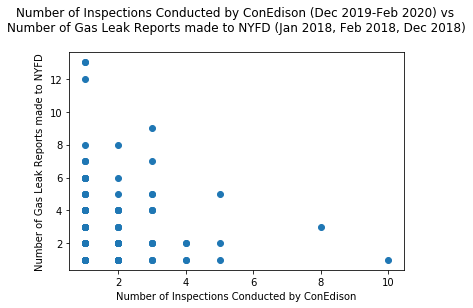

------------------- SHOWING THE SAME SCATTER PLOT ( interactive ) -------------------


In [32]:
print("------------------- SHOWING THE SAME SCATTER PLOT ( not interactive ) -------------------")
# NON INTERACTIVE PLOT:
titleStr =  'Number of Inspections Conducted by ConEdison (Dec 2019-Feb 2020) vs \nNumber of Gas Leak Reports made to NYFD (Jan 2018, Feb 2018, Dec 2018)\n'
plt.scatter(vsDF.NumberOfReports_ConEd.values, vsDF.NumberOfReports_FDNY.values,)
plt.xlabel('Number of Inspections Conducted by ConEdison')
plt.ylabel('Number of Gas Leak Reports made to NYFD')
plt.title(titleStr)
plt.show()

print("------------------- SHOWING THE SAME SCATTER PLOT ( interactive ) -------------------")
# INTERACTIVE PLOT:
titleStr =  'Number of Inspections Conducted by ConEdison vs \nNumber of Gas Leak Reports made to NYFD \n'
fig = px.scatter(vsDF, x="NumberOfReports_ConEd", y="NumberOfReports_FDNY", color="CountyName", hover_data=['MonthYear_ConEd', 'MonthYear_FDNY', 'Geoid', "CensusTract" ])
# print("***TITLE OF SCATTER PLOT:*** \n"+titleStr)
fig.update_layout(title=titleStr)
fig.show() 
            